# Compeletition : click-through Rate prediction
https://www.kaggle.com/c/avazu-ctr-prediction

this notebook  were wrote with python 3.6 installed with anaconda 

In [1]:
import pandas as pd

In [2]:
# expore data first
X_train_display = pd.read_csv("data/train",nrows=10)

In [3]:
from IPython.display import display
display(X_train_display)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23


- id: ad identifier
- click: 0/1 for non-click/click
- hour: format is YYMMDDHH, so 14091123 means 23:00 on Sept. 11, 2014 UTC.
- C1 -- anonymized categorical variable
- banner_pos
- site_id
- site_domain
- site_category
- app_id
- app_domain
- app_category
- device_id
- device_ip
- device_model
- device_type
- device_conn_type
- C14-C21 -- anonymized categorical variables

It seems thoat most of data are De-identified.

In [4]:
# now I Wanna check features distribution.
X_train = pd.read_csv("data/train")
X_test = pd.read_csv("data/test")

In [5]:
p_=X_train.click.value_counts()
p_bar = p_[1]/len(X_train)
print("Mena click probaility in training set is about {}".format(p_bar))

Mena click probaility in training set is about 0.16980562476404604


## Hours
the training set start at 14102100-14103023

the testing set start at 14103100-14103123

testing data is the day after training set(10 days)

wanna check:
- if same weekday have simiar behavior (i.e. 141031 v.s. 141024)
- if different click rate between weekday/hours

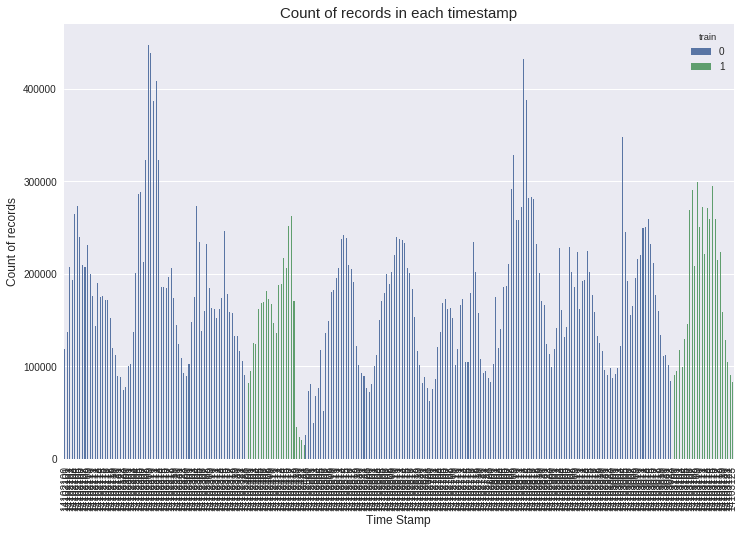

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
color = sns.color_palette()
%matplotlib inline


click_time_counts_train = X_train.hour.value_counts().sort_index()
click_time_counts_test = X_test.hour.value_counts().sort_index()

click_time_counts_train = pd.DataFrame({'value':click_time_counts_train,'train':[0]*len(click_time_counts_train)})
click_time_counts_test = pd.DataFrame({'value':click_time_counts_test,'train':[1]*len(click_time_counts_test)})


click_time_counts = pd.concat([click_time_counts_train, click_time_counts_test]).sort_index()

start = np.where(click_time_counts.index == 14102400)[0][0]
end = np.where(click_time_counts.index == 14102423)[0][0]
# label the same weekday
click_time_counts.iloc[start:end,[0]]=1

plt.figure(figsize=(12,8))
sns.barplot(click_time_counts.index, click_time_counts.value, hue = click_time_counts.train)

plt.ylabel('Count of records', fontsize=12)
plt.xlabel('Time Stamp', fontsize=12)
plt.title('Count of records in each timestamp', fontsize=15)
plt.xticks(rotation='vertical')

plt.show()


I seems the weekday behavior differently. 

but, there may be some effects for weekend/weekday on click-rate,

go on check probability between weekday/hour and click rate

for hour: 0,  click rate: 0.18035135793880105
for hour: 1,  click rate: 0.18577373312320264
for hour: 2,  click rate: 0.17610773780703246
for hour: 3,  click rate: 0.1741993036459588
for hour: 4,  click rate: 0.15956741795010632
for hour: 5,  click rate: 0.16338736309889268
for hour: 6,  click rate: 0.16811639586712301
for hour: 7,  click rate: 0.1791903158293643
for hour: 8,  click rate: 0.1632046345307652
for hour: 9,  click rate: 0.16010404142328175
for hour: 10,  click rate: 0.16125591518692992
for hour: 11,  click rate: 0.17043668613850818
for hour: 12,  click rate: 0.17073260960676861
for hour: 13,  click rate: 0.16843427260510815
for hour: 14,  click rate: 0.1774484358882315
for hour: 15,  click rate: 0.18120976909055445
for hour: 16,  click rate: 0.17944523696306863
for hour: 17,  click rate: 0.17326500214089294
for hour: 18,  click rate: 0.16817221741350855
for hour: 19,  click rate: 0.1639955242845493
for hour: 20,  click rate: 0.16051084775134364
for hour: 21,  click rate: 0

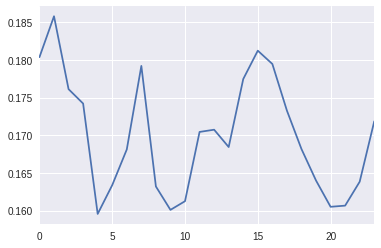

In [7]:
hourvalues = (click_time_counts.index%100).unique()
click_avg_list=[]
for i in hourvalues:
    click_avg=X_train.loc[np.where(X_train.hour%100 == i)].click.mean()
    click_avg_list.append(click_avg)
    print("for hour: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

most high click rate is hour1, and lowest is hour4. it seems a userful feature for roughly estimation.

for Day: 21, Wed,  click rate: 0.17419812539185714
for Day: 22, Thurs,  click rate: 0.15716698462805637
for Day: 23, Fri,  click rate: 0.18218966237051612
for Day: 24, Sat,  click rate: 0.17471581284093615
for Day: 25, Sun,  click rate: 0.1824019467625617
for Day: 26, Mon,  click rate: 0.18304894924048956
for Day: 27, Tues,  click rate: 0.18159416559948652
for Day: 28, Wed,  click rate: 0.15218237478963434
for Day: 29, Thurs,  click rate: 0.1565620590469988
for Day: 30, Fri,  click rate: 0.16928075264438586


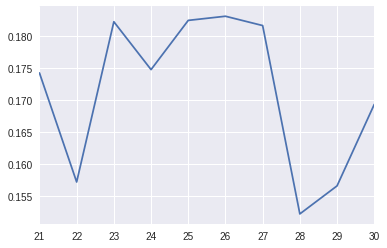

In [50]:
dayvalues = (X_train.hour%10000/100).astype(int).unique()
weekdays = ['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
click_avg_list=[]
for i in dayvalues:
    click_avg=X_train.loc[np.where((X_train.hour%10000/100).astype(int) == i)].click.mean()
    click_avg_list.append(click_avg)
    print("for Day: {}, {},  click rate: {}".format(i,weekdays[(i+2)%7],click_avg))
sns.tsplot(data=np.asarray(click_avg_list),time=dayvalues)



it seems that click rate during 2~6 has more stable high rate, and if weekyday has effects on click rate

the testing data may has similar effct as Day3(0.175) above

##  C1 distribution

In [9]:
print (X_train.C1.value_counts()/len(X_train))
print (X_test.C1.value_counts()/len(X_test))

1005    0.918664
1002    0.054931
1010    0.022347
1012    0.002808
1007    0.000873
1001    0.000234
1008    0.000143
Name: C1, dtype: float64
1005    9.430316e-01
1002    3.657593e-02
1010    1.469373e-02
1012    3.144754e-03
1007    2.119077e-03
1001    4.347385e-04
1008    2.184616e-07
Name: C1, dtype: float64


C1 values  were slightly different but the order are the same between training set and testing set

for C1 value: 1001,  click rate: 0.033393215682130405
for C1 value: 1002,  click rate: 0.21073148019733323
for C1 value: 1005,  click rate: 0.1693308826839565
for C1 value: 1007,  click rate: 0.03942895989123046
for C1 value: 1008,  click rate: 0.12165197857266287
for C1 value: 1010,  click rate: 0.09521537826371371
for C1 value: 1012,  click rate: 0.17249277609415745


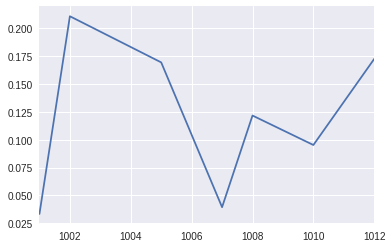

In [10]:
# to see if the value of C1 indicate something about click rate
C1_values = X_train.C1.unique()
C1_values.sort()
click_avg_list=[]
for i in C1_values:
    click_avg=X_train.loc[np.where((X_train.C1 == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for C1 value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list),time=C1_values)

it seems has obviously difference in C1 values, and not likely to using numerical type to explain click rate

major values pair here are: 
- 1005[90%]:0.16
- 1002[5%]:0.21
- 1010[2%]:0.09 

**It seems 1002,1010 that this variable is useful obviously higher/lower than avg . **

## banner_pos 

In [11]:
print (X_train.banner_pos.value_counts()/len(X_train))
print (X_test.banner_pos.value_counts()/len(X_test))

0    0.720018
1    0.278199
7    0.001078
2    0.000322
4    0.000191
5    0.000143
3    0.000050
Name: banner_pos, dtype: float64
0    0.798182
1    0.199498
7    0.001219
3    0.000710
2    0.000346
4    0.000045
Name: banner_pos, dtype: float64


Testing set did not have the 5 value in banner and the order of 2,3,4 are different (but the propotion very little)

for banner value: 0,  click rate: 0.16427235835338114
for banner value: 1,  click rate: 0.18361449459522755
for banner value: 2,  click rate: 0.11922159833858934
for banner value: 3,  click rate: 0.1828009828009828
for banner value: 4,  click rate: 0.1853582554517134
for banner value: 5,  click rate: 0.12149532710280374
for banner value: 7,  click rate: 0.3201000527801363


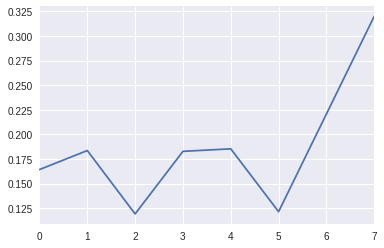

In [12]:
banner_pos_values = X_train.banner_pos.unique()
banner_pos_values.sort()
click_avg_list=[]

for i in banner_pos_values:
    click_avg=X_train.loc[np.where((X_train.banner_pos == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for banner value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list),time=banner_pos_values)

most import values here is 0(72%):0.16 , 1(27%):0.18, 7(0.1%):0.32, althrough 7 grow up but the propotion is very small (0.1%),

major value
- 0[72%]: 0.16
- 1[27%]: 0.18 (higher than overall avg)

## [Server] site_id, site_domain, site_category

## site_id 

In [13]:
site_count_train = X_train.site_id.value_counts()/len(X_train)
print ("there are {} sites in training set".format(len(site_count_train)))
print ("and for first 10 sites includes {}% of records".format(sum(site_count_train[0:10])))
print ("and for first 100 sites includes {}% of records".format(sum(site_count_train[0:100])))
print ("and for first 500 sites includes {}% of records".format(sum(site_count_train[0:500])))
print ("and for first 1000 sites includes {}% of records".format(sum(site_count_train[0:1000])))

there are 4737 sites in training set
and for first 10 sites includes 0.7003338225287823% of records
and for first 100 sites includes 0.9097911900642922% of records
and for first 500 sites includes 0.9788013134246046% of records
and for first 1000 sites includes 0.9931108801271123% of records


In [14]:
site_count_test = X_test.site_id.value_counts()/len(X_test)
print ("there are {} sites in testing set".format(len(site_count_test)))
print ("and for first 10 sites includes {}% of records".format(sum(site_count_test[0:10])))
print ("and for first 100 sites includes {}% of records".format(sum(site_count_test[0:100])))
print ("and for first 500 sites includes {}% of records".format(sum(site_count_test[0:500])))
print ("and for first 1000 sites includes {}% of records".format(sum(site_count_test[0:1000])))
print(site_count_train[0:10])
print(site_count_test[0:10])

there are 2825 sites in testing set
and for first 10 sites includes 0.7823733840397215% of records
and for first 100 sites includes 0.941939248457224% of records
and for first 500 sites includes 0.9894590104913976% of records
and for first 1000 sites includes 0.9971335656599366% of records
85f751fd    0.361032
1fbe01fe    0.160433
e151e245    0.065244
d9750ee7    0.023838
5b08c53b    0.022591
5b4d2eda    0.019079
856e6d3f    0.018944
a7853007    0.011410
b7e9786d    0.009130
5ee41ff2    0.008633
Name: site_id, dtype: float64
85f751fd    0.375602
17d1b03f    0.177621
1fbe01fe    0.093908
e151e245    0.058738
5b08c53b    0.020932
5b4d2eda    0.019437
d9750ee7    0.013176
57ef2c87    0.008276
5ee41ff2    0.007649
856e6d3f    0.007034
Name: site_id, dtype: float64


In [15]:
site_count_test.index.get_loc('a7853007')

252

the both top 10 sites 
 - a7853007 - training set with 1% propotion ,testing 0.001%
 - 17d1b03f - testing set with 17% - **never occurs in traning data!! **


for site id value: 85f751fd,  click rate: 0.11882644017386244
for site id value: 1fbe01fe,  click rate: 0.20563261719201684
for site id value: e151e245,  click rate: 0.2963240978001302
for site id value: d9750ee7,  click rate: 0.2801207788367255
for site id value: 5b08c53b,  click rate: 0.4672049927462842
for site id value: 5b4d2eda,  click rate: 0.13001322339763535
for site id value: 856e6d3f,  click rate: 0.04275543125588367
for site id value: a7853007,  click rate: 0.10229107912015972
for site id value: b7e9786d,  click rate: 0.07401537256941905
for site id value: 5ee41ff2,  click rate: 0.3312388254710494


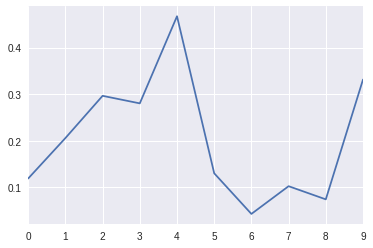

In [16]:
site_id_values = site_count_train[0:10].index

click_avg_list=[]

for i in site_id_values:
    click_avg=X_train.loc[np.where((X_train.site_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site id value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

In [17]:
print (len(site_count_train))
print (len(site_count_test))
print (len(site_count_test.index.intersection(site_count_train.index)))

4737
2825
2720


this varible seems important since that avg click rate for the top 10 site 

are significantly differ from overall avg 0.16

one problem is that are some sites in testing never saw in the training set. (1 of first 100 , 982 of first 1000)

and adding sites that not seem in the testing data may cause the loss in training set explained but not in testing (not sure if remove the not duplicated feature.)

but even only remain the intercept of siteid : there are still 2720 sites there, it's a high dimensions. (for my computer)

it may need some skills like:
- feature hashing 
- pre-clustering 

to handle the siteid.


## site_domain

In [18]:
site_domain_train = X_train.site_domain.value_counts()/len(X_train)
print ("there are {} sites_domain in training set".format(len(site_domain_train)))
print ("and for first 10 sites_domain includes {}% of records".format(sum(site_domain_train[0:10])))
print ("and for first 100 sites_domain includes {}% of records".format(sum(site_domain_train[0:100])))
print ("and for first 500 sites_domain includes {}% of records".format(sum(site_domain_train[0:500])))
print ("and for first 1000 sites_domain includes {}% of records".format(sum(site_domain_train[0:1000])))

there are 7745 sites_domain in training set
and for first 10 sites_domain includes 0.7409259553923304% of records
and for first 100 sites_domain includes 0.937162777371977% of records
and for first 500 sites_domain includes 0.9859766389776915% of records
and for first 1000 sites_domain includes 0.9948378596959954% of records


In [19]:
site_domain_test = X_test.site_domain.value_counts()/len(X_test)
print ("there are {} sites_domain in testing set".format(len(site_domain_test)))
print ("and for first 10 sites_domain includes {}% of records".format(sum(site_domain_test[0:10])))
print ("and for first 100 sites_domain includes {}% of records".format(sum(site_domain_test[0:100])))
print ("and for first 500 sites_domain includes {}% of records".format(sum(site_domain_test[0:500])))
print ("and for first 1000 sites_domain includes {}% of records".format(sum(site_domain_test[0:1000])))


there are 3366 sites_domain in testing set
and for first 10 sites_domain includes 0.808233554649474% of records
and for first 100 sites_domain includes 0.9594458853199063% of records
and for first 500 sites_domain includes 0.9925749279513717% of records
and for first 1000 sites_domain includes 0.9975807565062214% of records


In [20]:
print(site_domain_train[0:10])
print(site_domain_test[0:10])

c4e18dd6    0.374280
f3845767    0.160433
7e091613    0.082243
7687a86e    0.031912
98572c79    0.024656
16a36ef3    0.021165
58a89a43    0.018944
9d54950b    0.009298
b12b9f85    0.009249
17d996e6    0.008746
Name: site_domain, dtype: float64
c4e18dd6    0.384341
f3845767    0.271529
7e091613    0.059876
7687a86e    0.028738
16a36ef3    0.021100
98572c79    0.013668
bd6d812f    0.008276
17d996e6    0.007713
58a89a43    0.007034
b12b9f85    0.005959
Name: site_domain, dtype: float64


it's similar as site_id 9d54950b in training, bd6d812f in testing

for domain value: c4e18dd6,  click rate: 0.12275013466727122
for domain value: f3845767,  click rate: 0.20563261719201684
for domain value: 7e091613,  click rate: 0.2583572731253579
for domain value: 7687a86e,  click rate: 0.4598357574418776
for domain value: 98572c79,  click rate: 0.27436959278342243
for domain value: 16a36ef3,  click rate: 0.1422612967841007
for domain value: 58a89a43,  click rate: 0.04275543125588367
for domain value: 9d54950b,  click rate: 0.11234905863667925
for domain value: b12b9f85,  click rate: 0.07485725747141807
for domain value: 17d996e6,  click rate: 0.3287245475113122


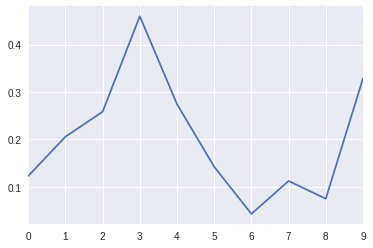

In [21]:
site_domain_values = site_domain_train[0:10].index

click_avg_list=[]
for i in site_domain_values:
    click_avg=X_train.loc[np.where((X_train.site_domain == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for domain value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

In [22]:
print (len(site_domain_train.index))
print (len(site_domain_test.index))
print (len(site_domain_test.index.intersection(site_domain_train.index)))

7745
3366
3199


like site is the value are significantly differ from avg~0.16
site_domain values is more than site_id ,

the differnce lead me to intution of serve overfitting. (training loss explained by the features that not been seen testing set.)


## site_category

In [23]:
site_category_train = X_train.site_category.value_counts()/len(X_train)
print ("there are {} site_category in training set".format(len(site_category_train)))
print ("and for first 10 site_category includes {}% of records".format(sum(site_category_train[0:5])))
print ("and for first 20 site_category includes {}% of records".format(sum(site_category_train[0:10])))


there are 26 site_category in training set
and for first 10 site_category includes 0.9862797632202673% of records
and for first 20 site_category includes 0.9979671258976269% of records


In [24]:
site_category_test = X_test.site_category.value_counts()/len(X_test)
print ("there are {} site_category in testing set".format(len(site_category_test)))
print ("and for first 10 site_category includes {}% of records".format(sum(site_category_test[0:5])))
print ("and for first 20 site_category includes {}% of records".format(sum(site_category_test[0:10])))


there are 22 site_category in testing set
and for first 10 site_category includes 0.9812948829308106% of records
and for first 20 site_category includes 0.9955224115361695% of records


In [25]:
print (len(site_category_test.index.intersection(site_category_train.index)))

22


for site_category value: 50e219e0,  click rate: 0.1285795435923565
for site_category value: f028772b,  click rate: 0.1795786434983823
for site_category value: 28905ebd,  click rate: 0.20801907713595713
for site_category value: 3e814130,  click rate: 0.2830027544777475
for site_category value: f66779e6,  click rate: 0.039686909538880814
for site_category value: 75fa27f6,  click rate: 0.11128365996832003
for site_category value: 335d28a8,  click rate: 0.09364443109121154
for site_category value: 76b2941d,  click rate: 0.03026137426733108
for site_category value: c0dd3be3,  click rate: 0.11199809931100024
for site_category value: 72722551,  click rate: 0.057626878366884036


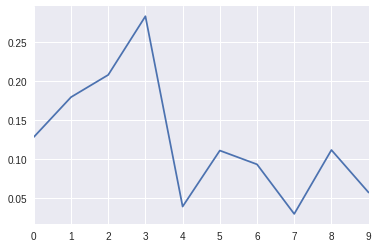

In [26]:
site_domain_values = site_category_train[0:10].index

click_avg_list=[]
for i in site_domain_values:
    click_avg=X_train.loc[np.where((X_train.site_category == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for site_category value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

has similar result as site_id, site_domain

## [App] app_id, app_domain, app_category

In [27]:
app_id_train = X_train.app_id.value_counts()/len(X_train)
print ("there are {} app_id in training set".format(len(app_id_train)))
print ("and for first 10 app_id includes {}% of records".format(sum(app_id_train[0:10])))
print ("and for first 100 app_id includes {}% of records".format(sum(app_id_train[0:100])))
print ("and for first 1000 app_id includes {}% of records".format(sum(app_id_train[0:1000])))

app_id_test = X_test.app_id.value_counts()/len(X_test)
print ("there are {} app_id in test set".format(len(app_id_test)))
print ("and for first 10 app_id includes {}% of records".format(sum(app_id_test[0:10])))
print ("and for first 100 app_id includes {}% of records".format(sum(app_id_test[0:100])))
print ("and for first 1000 app_id includes {}% of records".format(sum(app_id_test[0:1000])))


there are 8552 app_id in training set
and for first 10 app_id includes 0.8015270585568016% of records
and for first 100 app_id includes 0.9475593823606717% of records
and for first 1000 app_id includes 0.9949173324166294% of records
there are 3952 app_id in test set
and for first 10 app_id includes 0.8341819837359726% of records
and for first 100 app_id includes 0.9586072113292425% of records
and for first 1000 app_id includes 0.996781187137682% of records


In [28]:
print (len(app_id_test.index.intersection(app_id_train.index)))

3368


for app_id value: ecad2386,  click rate: 0.19861002453080054
for app_id value: 92f5800b,  click rate: 0.019298095587748337
for app_id value: e2fcccd2,  click rate: 0.19458448773090903
for app_id value: febd1138,  click rate: 0.048211166410661074
for app_id value: 9c13b419,  click rate: 0.30533562413896853
for app_id value: 7358e05e,  click rate: 0.18730416561761434
for app_id value: a5184c22,  click rate: 0.2472505224261736
for app_id value: d36838b1,  click rate: 0.07102051698967594
for app_id value: 685d1c4c,  click rate: 0.07601924041956844
for app_id value: 54c5d545,  click rate: 0.1242415632158474


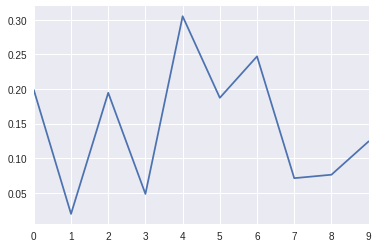

In [29]:
app_id_values = app_id_train[0:10].index

click_avg_list=[]
for i in app_id_values:
    click_avg=X_train.loc[np.where((X_train.app_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for app_id value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

I think that app, site ,devices should connect to each other, there must exist strongly Interaction between variables

Q : how to derive a good feature hasing with more than one feature?


## Devices
- device_id
- device_ip
- device_model
- device_type
- device_conn_type

### Device_id

In [30]:
device_id_train = X_train.device_id.value_counts()/len(X_train)
print ("there are {} device_id in training set".format(len(device_id_train)))
print ("and for first 10 device_id includes {}% of records".format(sum(device_id_train[0:10])))
print ("and for first 100 device_id includes {}% of records".format(sum(device_id_train[0:100])))
print ("and for first 1000 device_id includes {}% of records".format(sum(device_id_train[0:1000])))

device_id_test = X_test.device_id.value_counts()/len(X_test)
print ("there are {} device_id in test set".format(len(device_id_test)))
print ("and for first 10 device_id includes {}% of records".format(sum(device_id_test[0:10])))
print ("and for first 100 device_id includes {}% of records".format(sum(device_id_test[0:100])))
print ("and for first 1000 device_id includes {}% of records".format(sum(device_id_test[0:1000])))


there are 2686408 device_id in training set
and for first 10 device_id includes 0.8271875459988872% of records
and for first 100 device_id includes 0.8288558794984787% of records
and for first 1000 device_id includes 0.8334813748765809% of records
there are 291759 device_id in test set
and for first 10 device_id includes 0.8624970070764074% of records
and for first 100 device_id includes 0.8657260876328035% of records
and for first 1000 device_id includes 0.8751061723259905% of records


there are 2686408 device_id but ~0.82 fucus in first ten devices id


In [31]:
print (device_id_train[0:5])
print (device_id_test[0:5])

a99f214a    0.825109
0f7c61dc    0.000528
c357dbff    0.000486
936e92fb    0.000339
afeffc18    0.000239
Name: device_id, dtype: float64
a99f214a    0.861110
afeffc18    0.000515
936e92fb    0.000184
bcf28145    0.000122
93cb7907    0.000107
Name: device_id, dtype: float64


you will see that most of device_id is a99f214a : ~82% in training set, and the second major device_id is ~0.05%

for device_id value: a99f214a,  click rate: 0.17415196837921157
for device_id value: 0f7c61dc,  click rate: 0.75810076793407
for device_id value: c357dbff,  click rate: 0.63400620328469
for device_id value: 936e92fb,  click rate: 0.06381271878646441
for device_id value: afeffc18,  click rate: 0.22902423865755128
for device_id value: 987552d1,  click rate: 0.0
for device_id value: 28dc8687,  click rate: 0.0
for device_id value: d857ffbb,  click rate: 0.22477522477522477
for device_id value: cef4c8cc,  click rate: 0.24390904168922578
for device_id value: b09da1c4,  click rate: 0.13105335157318743


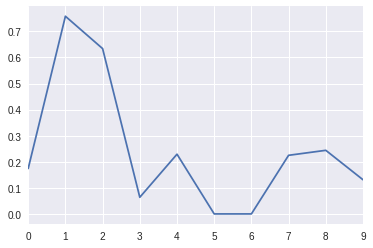

In [32]:
device_id_values = device_id_train[0:10].index
click_avg_list=[]
for i in device_id_values:
    click_avg=X_train.loc[np.where((X_train.device_id == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device_id value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

In [33]:
print (len(device_id_test.index.intersection(device_id_train.index)))

82194


the major device are slightly higher than avg, and device with 0f7c61dc has extreamly high ctrp.

the overlap devices are only 82194 relative to 2686408

### Device_ip

In [34]:
len(X_train)

40428967

In [35]:
device_ip_train = X_train.device_ip.value_counts()/len(X_train)
print ("there are {} Device_ip in training set".format(len(device_ip_train)))
print ("and for first 10 Device_ip includes {}% of records".format(sum(device_ip_train[0:10])))
print ("and for first 100 Device_ip includes {}% of records".format(sum(device_ip_train[0:100])))
print ("and for first 1000 Device_ip includes {}% of records".format(sum(device_ip_train[0:1000])))

device_ip_test = X_test.device_ip.value_counts()/len(X_test)
print ("there are {} Device_ip in test set".format(len(device_ip_test)))
print ("and for first 10 Device_ip includes {}% of records".format(sum(device_ip_test[0:10])))
print ("and for first 100 Device_ip includes {}% of records".format(sum(device_ip_test[0:100])))
print ("and for first 1000 Device_ip includes {}% of records".format(sum(device_ip_test[0:1000])))


there are 6729486 Device_ip in training set
and for first 10 Device_ip includes 0.02547735142478412% of records
and for first 100 Device_ip includes 0.07263314444813788% of records
and for first 1000 Device_ip includes 0.13118341608876652% of records
there are 1077199 Device_ip in test set
and for first 10 Device_ip includes 0.02377735794317552% of records
and for first 100 Device_ip includes 0.06313779857143606% of records
and for first 1000 Device_ip includes 0.12725408654224288% of records


6 million device_ips in training set , 1 million in testing set

and the ratio is more even than device_id, maybe device_id means some category like personal-computer 

and device_ip has more likelyto identify user.

for device_ip value: 6b9769f2,  click rate: 0.22034872856383056
for device_ip value: 431b3174,  click rate: 0.19476507884896765
for device_ip value: 2f323f36,  click rate: 0.0986903806822676
for device_ip value: af9205f9,  click rate: 0.09605664587222804
for device_ip value: 930ec31d,  click rate: 0.09392385856821003
for device_ip value: af62faf4,  click rate: 0.09403044218083495
for device_ip value: 009a7861,  click rate: 0.09660115715256143
for device_ip value: 285aa37d,  click rate: 0.09547196792985829
for device_ip value: 6394f6f6,  click rate: 0.09296258895941527
for device_ip value: d90a7774,  click rate: 0.09285369968667148


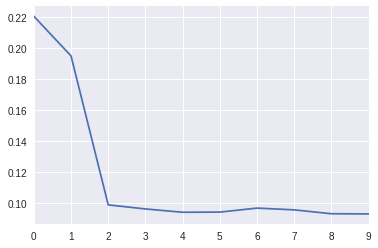

In [36]:
device_ip_values = device_ip_train[0:10].index

click_avg_list=[]
for i in device_ip_values:
    click_avg=X_train.loc[np.where((X_train.device_ip == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device_ip value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

### Device model

In [37]:
device_model_train = X_train.device_model.value_counts()/len(X_train)
print ("there are {} device_model in training set".format(len(device_model_train)))
print ("and for first 10 device_model includes {}% of records".format(sum(device_model_train[0:10])))
print ("and for first 100 device_model includes {}% of records".format(sum(device_model_train[0:100])))
print ("and for first 1000 device_model includes {}% of records".format(sum(device_model_train[0:1000])))

device_model_test = X_test.device_model.value_counts()/len(X_test)
print ("there are {} device_model in test set".format(len(device_model_test)))
print ("and for first 10 device_model includes {}% of records".format(sum(device_model_test[0:10])))
print ("and for first 100 device_model includes {}% of records".format(sum(device_model_test[0:100])))
print ("and for first 1000 device_model includes {}% of records".format(sum(device_model_test[0:1000])))


there are 8251 device_model in training set
and for first 10 device_model includes 0.2430748725288974% of records
and for first 100 device_model includes 0.6367738507887184% of records
and for first 1000 device_model includes 0.9399271072149823% of records
there are 5438 device_model in test set
and for first 10 device_model includes 0.2531274959235069% of records
and for first 100 device_model includes 0.665110637680602% of records
and for first 1000 device_model includes 0.9509285053907583% of records


for device_model value: 8a4875bd,  click rate: 0.13820409127376837
for device_model value: 1f0bc64f,  click rate: 0.2244911712222701
for device_model value: d787e91b,  click rate: 0.2238691573753762
for device_model value: 76dc4769,  click rate: 0.1893143011168536
for device_model value: be6db1d7,  click rate: 0.18841640945844265
for device_model value: a0f5f879,  click rate: 0.16653210795540718
for device_model value: 4ea23a13,  click rate: 0.21177147126340573
for device_model value: 7abbbd5c,  click rate: 0.1725328386785681
for device_model value: ecb851b2,  click rate: 0.18107065025903354
for device_model value: d4897fef,  click rate: 0.1688793213974052


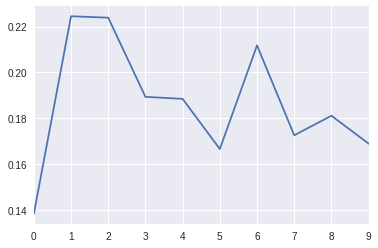

In [38]:
device_model_values = device_model_train[0:10].index

click_avg_list=[]
for i in device_model_values:
    click_avg=X_train.loc[np.where((X_train.device_model == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device_model value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list))

model are more less features compare to id,ip, but the relationship is not so obviously to ctr

### device_type

In [39]:
device_type_train = X_train.device_type.value_counts()/len(X_train)
print ("there are {} device_type in training set".format(len(device_type_train)))


device_type_test = X_test.device_type.value_counts()/len(X_test)
print ("there are {} device_type in test set".format(len(device_type_test)))



there are 5 device_type in training set
there are 4 device_type in test set


In [40]:
print (device_type_train)
print (device_type_test)

1    9.227213e-01
0    5.493121e-02
4    1.915142e-02
5    3.195357e-03
2    7.667769e-07
Name: device_type, dtype: float64
1    0.948730
0    0.036576
4    0.012644
5    0.002050
Name: device_type, dtype: float64


for device_type value: 1,  click rate: 0.16917577631774597
for device_type value: 0,  click rate: 0.21073148019733323
for device_type value: 4,  click rate: 0.09544449495784427
for device_type value: 5,  click rate: 0.09384216433796494
for device_type value: 2,  click rate: 0.06451612903225806


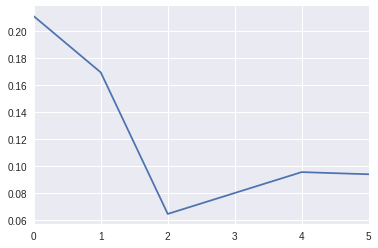

In [46]:
device_type_values = device_type_train.index

click_avg_list=[]
for i in device_type_values:
    click_avg=X_train.loc[np.where((X_train.device_type == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device_type value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list),time=device_type_values)

the type 1  occupied [~92%] of rows in training set, and the avg ctr is near avg

the type 0  [~ 5%] and ctr ~ 0.21 seems useful.

### device_conn_type

In [42]:
device_conn_type_train = X_train.device_conn_type.value_counts()/len(X_train)
print ("there are {} device_type in training set".format(len(device_conn_type_train)))

device_conn_type_test = X_test.device_conn_type.value_counts()/len(X_test)
print ("there are {} device_type in test set".format(len(device_conn_type_test)))



there are 4 device_type in training set
there are 4 device_type in test set


In [43]:
print (device_conn_type_train)
print (device_conn_type_test)

0    0.862917
2    0.082056
3    0.053966
5    0.001061
Name: device_conn_type, dtype: float64
0    0.842929
2    0.100459
3    0.054575
5    0.002037
Name: device_conn_type, dtype: float64


for device_conn_type value: 0,  click rate: 0.18112530003435678
for device_conn_type value: 2,  click rate: 0.13528943828123047
for device_conn_type value: 3,  click rate: 0.04404261443324674
for device_conn_type value: 5,  click rate: 0.029610631848915832


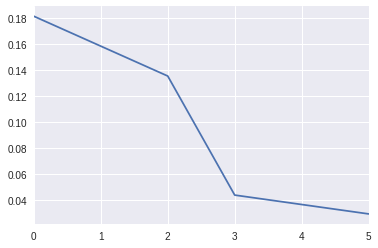

In [48]:
device_conn_type_values = device_conn_type_train.index

click_avg_list=[]
for i in device_conn_type_values:
    click_avg=X_train.loc[np.where((X_train.device_conn_type == i))].click.mean()
    click_avg_list.append(click_avg)
    print("for device_conn_type value: {},  click rate: {}".format(i,click_avg))
sns.tsplot(data=np.asarray(click_avg_list),time=device_conn_type_values)

the connection type seems a useful features since
- type 0 [~86%] : ~0.18
- type 2 [~8%] : ~0.13
- type 3 [~5%] : ~0.0

## C14-C21 : anonymized categorical variables
it said as categorical variables, 
and I think I need to take a trial for a small X to train model